In [1]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
# imports

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

In [2]:
# Load sequences and labels from disk

sequences = np.load('../sequences.npy')
labels = np.load('../labels.npy')

sequences_augmented = np.load('../sequences_augmented.npy')
labels_augmented = np.load('../labels_augmented.npy')
################!!!!!!!!!!!!!!!!!!!!! they are now nparrays instead of lists, so no need to convert them to nparrays again in the code below

In [3]:
X = sequences_augmented
y= to_categorical(labels_augmented).astype(int)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)    

In [5]:
from tensorflow import keras
from keras.layers import Dense, LSTM
from keras.models import Sequential
from keras.callbacks import TensorBoard

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)


C:\Users\Steve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.0435 - loss: 4.1056 - val_accuracy: 0.0735 - val_loss: 3.5944
Epoch 2/150
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.1147 - loss: 3.4403 - val_accuracy: 0.2214 - val_loss: 2.9137
Epoch 3/150
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.2236 - loss: 2.8350 - val_accuracy: 0.2154 - val_loss: 2.9569
Epoch 4/150
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3360 - loss: 2.3223 - val_accuracy: 0.4487 - val_loss: 1.9461
Epoch 5/150
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4646 - loss: 1.8021 - val_accuracy: 0.5538 - val_loss: 1.5689
Epoch 6/150
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5470 - loss: 1.4948 - val_accuracy: 0.5274 - val_loss: 1.5825
Epoch 7/150
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6300 - loss: 1.2393 - val_accuracy: 0.7239 - val_loss: 1.0090
Epoch 8/150
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7103 - loss: 0.9622 - 

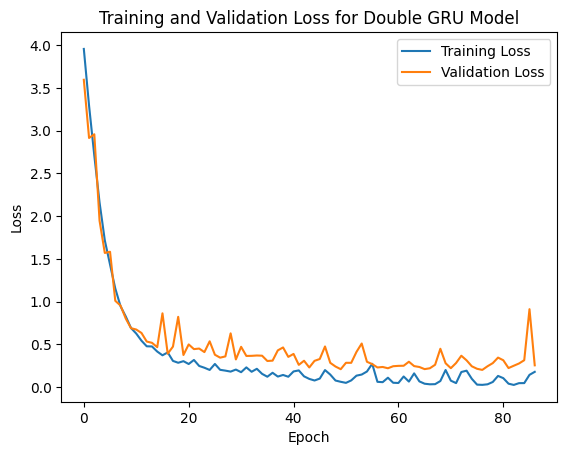

In [6]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define the model
model = Sequential()
model.add(GRU(64, return_sequences=True, input_shape=(30, 1662)))  # GRU layer
model.add(GRU(64))  # LSTM layer
model.add(Dense(65, activation='relu'))
model.add(Dense(65, activation='softmax'))  # 3 classes

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the early stopping monitor
early_stopping_monitor = EarlyStopping(patience=10, monitor='val_accuracy')

# Fit the model to the data
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2, callbacks=[early_stopping_monitor])

def plot_training_history(history, model_name):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss for ' + model_name)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot the training history
plot_training_history(history, 'Double GRU Model')

In [10]:
model.save('../actions/actions_double_gru.h5')  

In [9]:
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix


y_pred = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
ypred = np.argmax(y_pred, axis=1).tolist()

print(accuracy_score(ytrue, ypred))
multilabel_confusion_matrix(ytrue, ypred)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
0.94


array([[[635,   1],
        [  1,  13]],

       [[634,   6],
        [  4,   6]],

       [[630,   4],
        [  5,  11]],

       [[637,   0],
        [  0,  13]],

       [[637,   0],
        [  5,   8]],

       [[639,   0],
        [  1,  10]],

       [[642,   1],
        [  4,   3]],

       [[641,   0],
        [  1,   8]],

       [[644,   0],
        [  0,   6]],

       [[646,   0],
        [  1,   3]],

       [[635,   4],
        [  2,   9]],

       [[640,   2],
        [  1,   7]],

       [[642,   0],
        [  1,   7]],

       [[638,   0],
        [  0,  12]],

       [[638,   1],
        [  0,  11]],

       [[640,   0],
        [  2,   8]],

       [[639,   0],
        [  1,  10]],

       [[635,   5],
        [  0,  10]],

       [[637,   2],
        [  0,  11]],

       [[645,   0],
        [  0,   5]],

       [[643,   0],
        [  0,   7]],

       [[641,   0],
        [  0,   9]],

       [[643,   0],
        [  0,   7]],

       [[639,   1],
        [  0, 